## Zadatak 2

Za upoznavanje sa podacima koji sadrže pretežno kategorička obeležja
koristiće se skup podataka koji sadrži informacije o putnicima koji su plovili
„Titanikom“.

---

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [28]:
!gdown 1VIa6to3xMpMbCp2JQKzlGS5LZZ1AsE_H
df_train = pd.read_csv("titanic_data.csv") #https://www.kaggle.com/hesh97/titanicdataset-traincsv

Downloading...
From: https://drive.google.com/uc?id=1VIa6to3xMpMbCp2JQKzlGS5LZZ1AsE_H
To: /content/titanic_data.csv
100% 61.2k/61.2k [00:00<00:00, 3.77MB/s]


## 1.1 Upoznavanje sa bazom

Prvo da pogledamo kako izgleda skup podataka:
Koliko ima vrsta i kolona?
Koji su nazivi obeležja (kolona)?
Koja obeležja su numerička, a koja kategorička?
Da li neki podaci nedostaju?
Funkcije **shape** i **info** daće nam odgovore na ova pitanja.  
**head** pokazuje prvih nekoliko vrsta iz baze.

### shape, info, head

In [29]:
print(df_train.shape)

(891, 12)


In [30]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


df train ima 12 kolona (12 obeležja od kojih je jedno ID) i 891 uzorak (broj vrsta odnosno putnika).  
Za obelezja Age, Cabin i Embarked nedostaju neke vrednosti. S obzirom da za Cabin nedostaje cak preko 75% podataka, to obelezje cemo odbaciti. Obelezje Age ima oko 20% nedostajucih podataka, iako je to bas mnogo, dopunicemo sa medijanom. Obelezje Embarked nedostaje za svega 2 uzorka, tako da cemo odbaciti ta dva uzorka. Obelezja PassengerId i Name, s obzirom da su jedinstvena za svakog putnika, nisu nam korisna u analizi pa ce biti odbacena.

In [33]:
df_train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace= True, axis = 1)

In [34]:
df_train.loc[df_train['Embarked'].isnull()].index

Index([61, 829], dtype='int64')

In [35]:
df_train.drop([61,829], inplace= True, axis = 0)


In [36]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [37]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


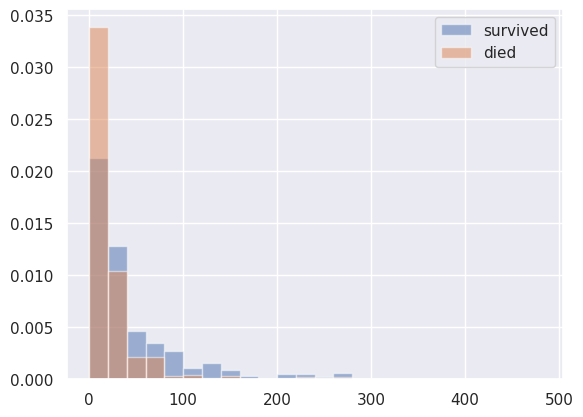

In [38]:
fare_survived=df_train.loc[df_train['Survived']==1, 'Fare']
fare_died=df_train.loc[df_train['Survived']==0, 'Fare']
plt.hist(fare_survived, bins=np.arange(0,500,20), alpha=0.5, label='survived', density=True)
plt.hist(fare_died, bins=np.arange(0,500,20), alpha=0.5, label='died', density=True)
plt.legend()

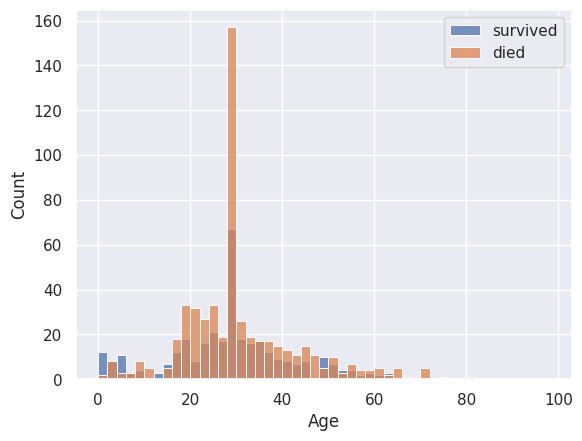

In [39]:
age_survived=df_train.loc[df_train['Survived']==1, 'Age']
age_died=df_train.loc[df_train['Survived']==0, 'Age']
sns.histplot(age_survived, bins=np.arange(0,100,2), label='survived')
sns.histplot(age_died, bins=np.arange(0,100,2), label='died')
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

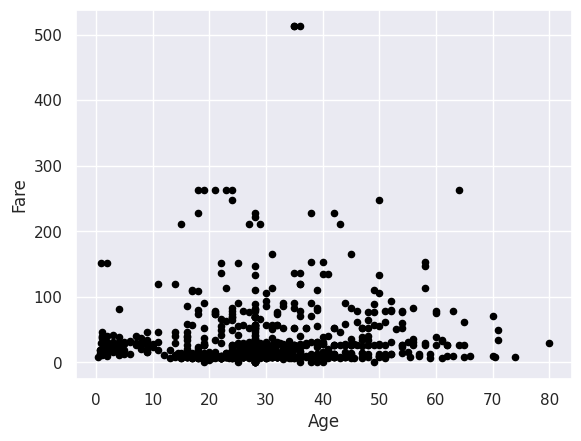

In [40]:
df_train.plot.scatter(x='Age', y='Fare', c="black")


<Axes: xlabel='Pclass', ylabel='Fare'>

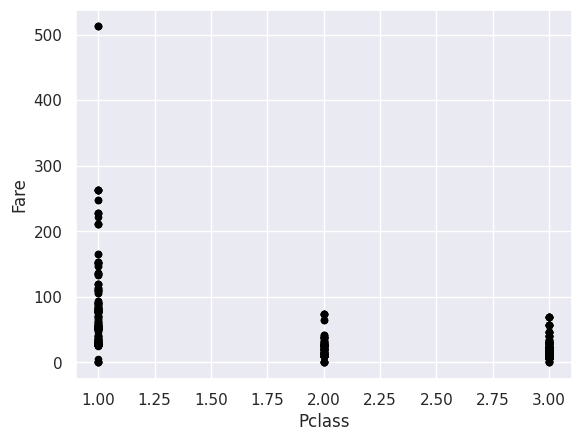

In [41]:
df_train.plot.scatter(x='Pclass', y='Fare', c="black")

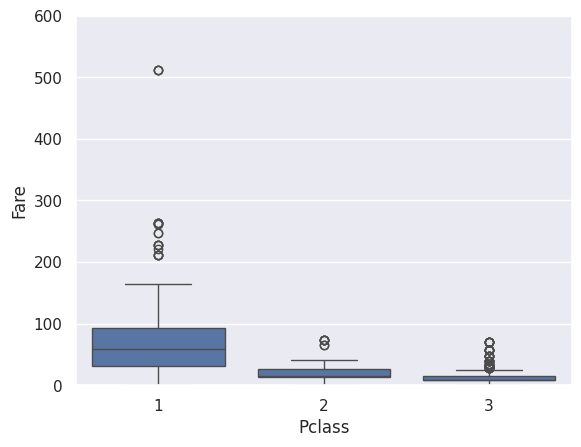

In [42]:
fig = sns.boxplot(x='Pclass', y="Fare", data=df_train)
fig.axis(ymin=0, ymax=600);

## 1.4 Međusobni odnosi (korelacija) numeričkih varijabli

<Axes: >

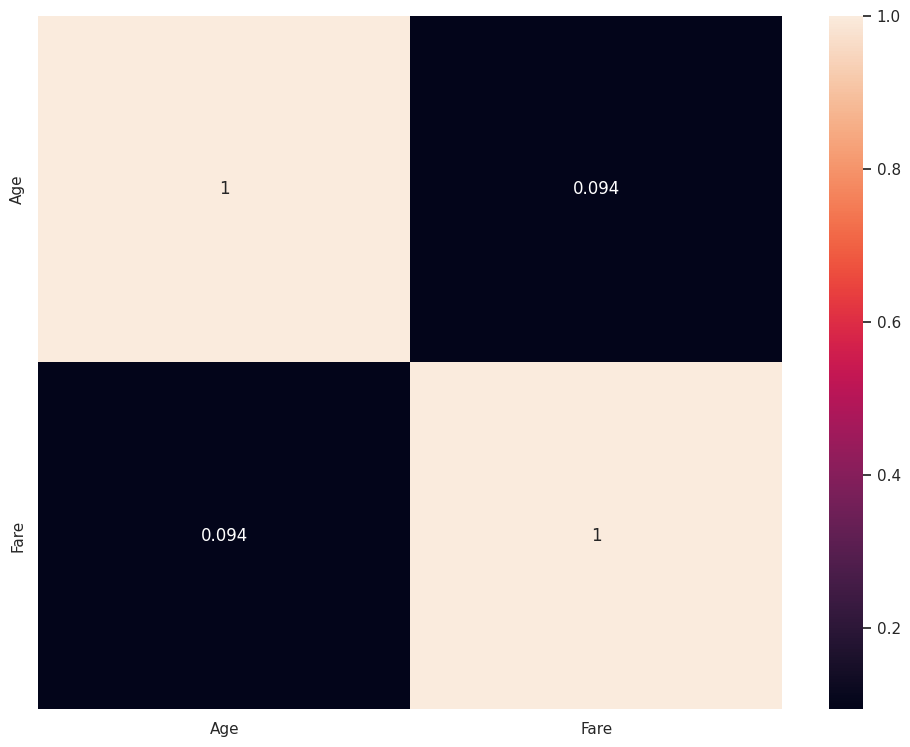

In [43]:
numerical_feats = df_train.dtypes[df_train.dtypes == "float64"].index

corr = df_train[numerical_feats].corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)

<Figure size 500x500 with 0 Axes>

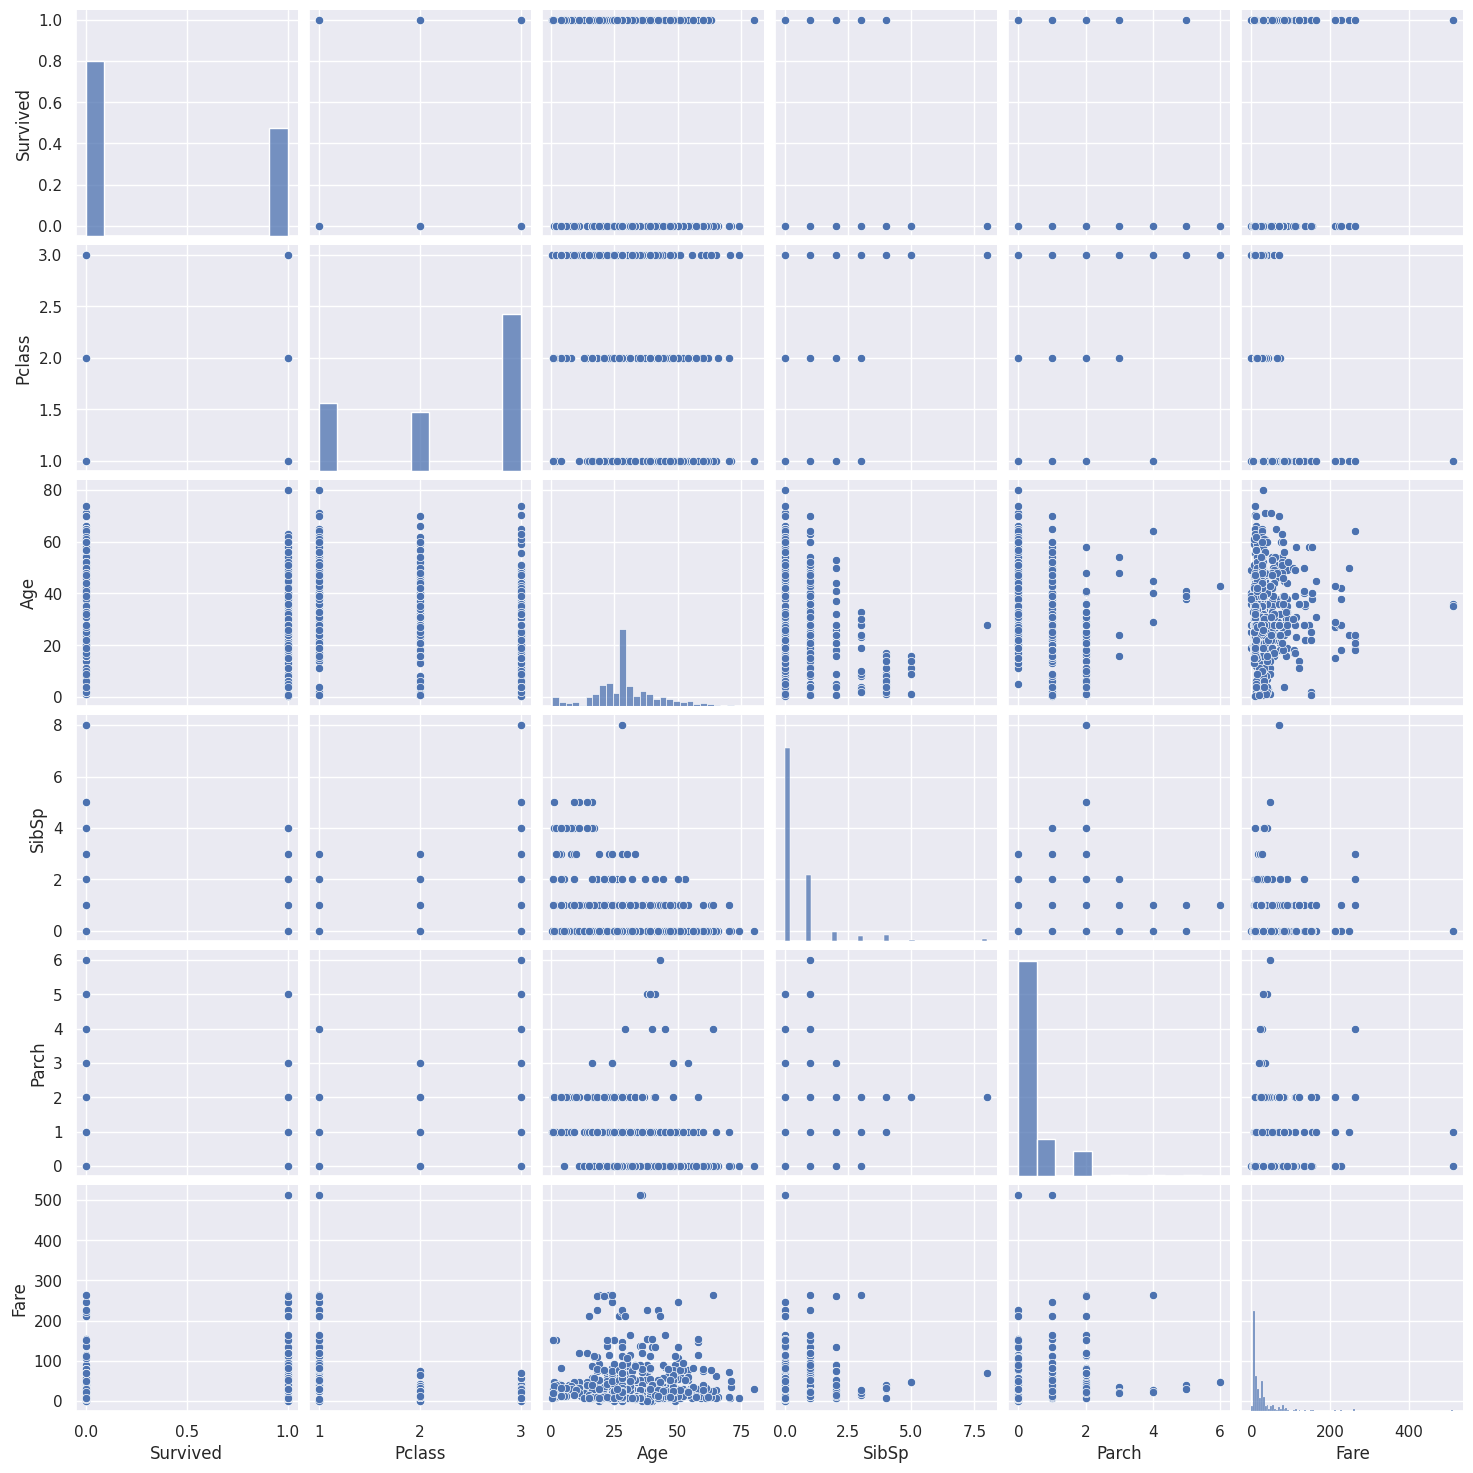

In [44]:
sns.set()
plt.figure(figsize=(5,5))
sns.pairplot(df_train, height = 2.5)
plt.show();

In [45]:
categorical_feats = np.concatenate((df_train.dtypes[df_train.dtypes == "int64"].index, df_train.dtypes[df_train.dtypes == "object"].index))
print("Number of Categorical features: ", len(categorical_feats))

for catg in list(categorical_feats) :
    print(df_train[catg].value_counts())
    print('#'*50)

Number of Categorical features:  6
Survived
0    549
1    340
Name: count, dtype: int64
##################################################
Pclass
3    491
1    214
2    184
Name: count, dtype: int64
##################################################
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
##################################################
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
##################################################
Sex
male      577
female    312
Name: count, dtype: int64
##################################################
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
##################################################


Razne korisne vizualizacije

In [46]:
pd.crosstab(df_train['Pclass'],df_train['Sex']).style.background_gradient(cmap='summer_r')

Sex,female,male
Pclass,,
1,92,122
2,76,108
3,144,347


In [47]:
pd.crosstab(df_train['Pclass'],df_train['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


<Axes: xlabel='Pclass', ylabel='count'>

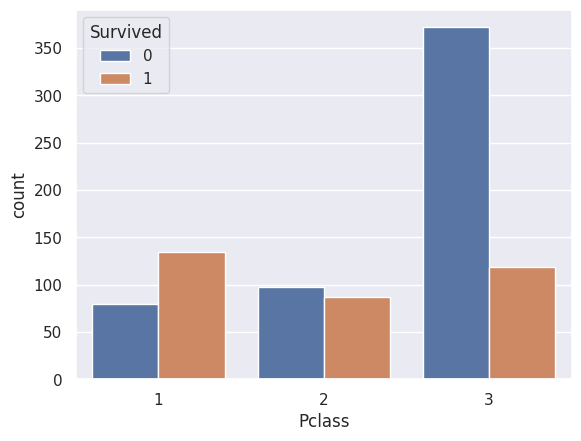

In [48]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)


<Axes: xlabel='Sex', ylabel='Age'>

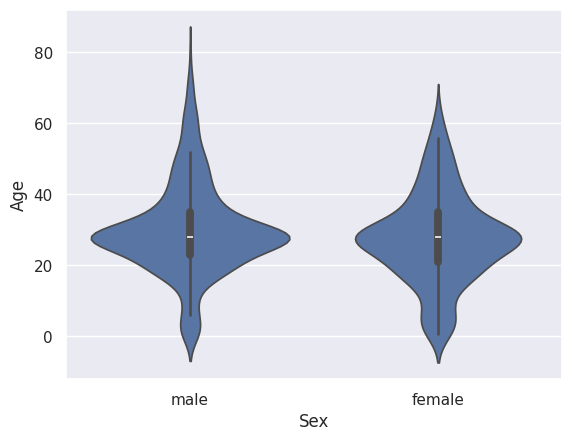

In [49]:
sns.violinplot(x='Sex', y='Age', data=df_train)


<Axes: xlabel='Sex', ylabel='Fare'>

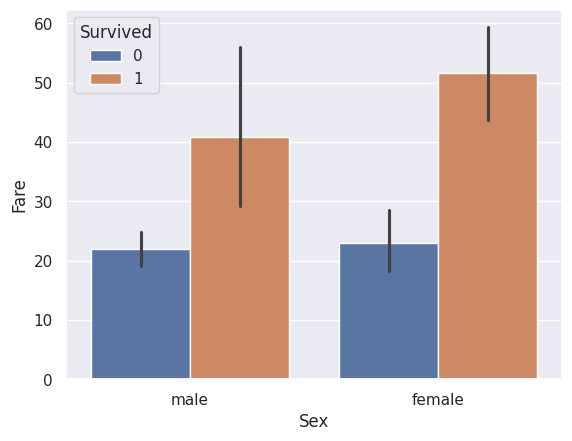

In [50]:
sns.barplot(x='Sex',y='Fare',hue='Survived',data=df_train)


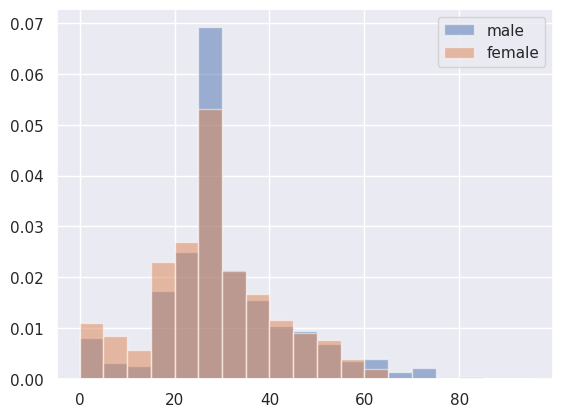

In [51]:
hist_a=plt.hist(df_train.loc[df_train['Sex']=='male','Age'], bins=np.arange(0,100,5), alpha=.50, density=True, label='male')
#fig = plt.figure()
hist_b=plt.hist(df_train.loc[df_train['Sex']=='female','Age'], bins=np.arange(0,100,5), alpha=.50, density=True, label='female')
plt.legend()


📊 Teorijsko objašnjenje pandas plotova i njihovih parametara

1. Line Plot (kind='line')
   - Prikazuje podatke kao spojene tačke (linija).
   - Idealno za vremenske serije ili bilo koji kontinuirani trend.
   - Parametri:
     • xlabel, ylabel – oznake osa
     • title – naslov grafa
     • grid – prikaz mreže
     • style – stil linije ('-', '--', 'o' itd.)
   - Primer: rast broja korisnika po mesecima

2. Bar Plot (kind='bar')
   - Poređenje kategorijskih vrednosti (stubičasti dijagram).
   - Svaka kategorija ima visinu koja predstavlja neku metriku.
   - Parametri:
     • x, y – šta ide na koju osu
     • color – boja stubaca
     • legend – prikaz legende
   - Primer: broj prodatih artikala po tipu

3. Horizontal Bar Plot (kind='barh')
   - Ista logika kao bar, ali horizontalno.
   - Koristi se kada je naziv kategorija dugačak.

4. Pie Chart (kind='pie')
   - Prikazuje proporcije celokupne vrednosti.
   - Samo jedna kolona može biti prikazana.
   - Parametri:
     • autopct – for

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


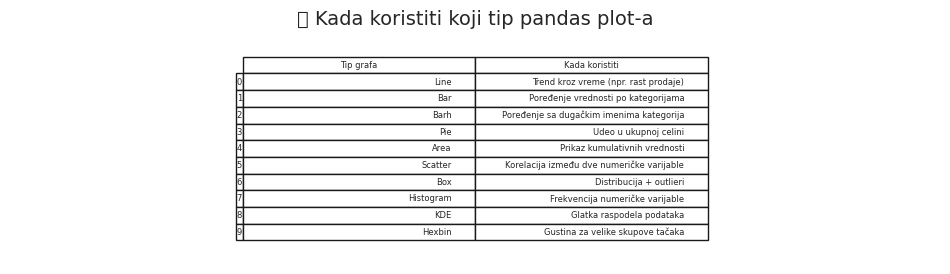

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Teorijsko objašnjenje pandas plotova i parametara
tekst = """
📊 Teorijsko objašnjenje pandas plotova i njihovih parametara

1. Line Plot (kind='line')
   - Prikazuje podatke kao spojene tačke (linija).
   - Idealno za vremenske serije ili bilo koji kontinuirani trend.
   - Parametri:
     • xlabel, ylabel – oznake osa
     • title – naslov grafa
     • grid – prikaz mreže
     • style – stil linije ('-', '--', 'o' itd.)
   - Primer: rast broja korisnika po mesecima

2. Bar Plot (kind='bar')
   - Poređenje kategorijskih vrednosti (stubičasti dijagram).
   - Svaka kategorija ima visinu koja predstavlja neku metriku.
   - Parametri:
     • x, y – šta ide na koju osu
     • color – boja stubaca
     • legend – prikaz legende
   - Primer: broj prodatih artikala po tipu

3. Horizontal Bar Plot (kind='barh')
   - Ista logika kao bar, ali horizontalno.
   - Koristi se kada je naziv kategorija dugačak.

4. Pie Chart (kind='pie')
   - Prikazuje proporcije celokupne vrednosti.
   - Samo jedna kolona može biti prikazana.
   - Parametri:
     • autopct – format prikaza procenata (npr. '%1.1f%%')
     • startangle – početni ugao (rotacija)
     • legend – dodavanje legende
   - Primer: udeo korisnika po platformi

5. Area Plot (kind='area')
   - Kao line plot, ali popunjava površinu ispod linije.
   - Koristi se za prikaz kumulativnih vrednosti.
   - Parametri: alpha (prozirnost), stacked (složeni prikaz)

6. Scatter Plot (kind='scatter')
   - Prikazuje individualne tačke (x, y), idealno za odnose između 2 numerička atributa.
   - Parametri:
     • x, y – obavezni
     • c – boja po vrednosti treće promenljive
     • s – veličina tačke
   - Primer: visina vs težina

7. Box Plot (kind='box')
   - Prikazuje raspodelu i outliere (medijana, kvartili).
   - Idealno za poređenje distribucija više atributa.

8. Histogram (kind='hist')
   - Prikazuje učestalost vrednosti unutar opsega (binovi).
   - Parametri:
     • bins – broj opsega
     • alpha – prozirnost
     • density – da li da se prikazuje kao verovatnoća

9. KDE Plot (kind='kde')
   - Prikazuje glatku procenu raspodele podataka.
   - Bolje za prikaz gustine nego histogram kada želimo kontinuitet.

10. Hexbin Plot (kind='hexbin')
   - Koristi se za velike skupove tačaka (scatter) kada želimo prikaz gustine.
   - Parametri:
     • gridsize – veličina heksagona
     • cmap – kolorna mapa
   - Idealno za 2D numeričke skupove podataka.

📌 Ostali česti parametri za sve grafike:
   • figsize=(w, h) – dimenzije
   • legend=True/False – prikaz legende
   • colormap='viridis' – kolorna mapa
   • rot – rotacija oznaka na X osi
"""

print(tekst)

# TABELA: Kada se koji graf koristi
tabela = pd.DataFrame({
    'Tip grafa': [
        'Line', 'Bar', 'Barh', 'Pie', 'Area', 'Scatter', 'Box', 'Histogram', 'KDE', 'Hexbin'
    ],
    'Kada koristiti': [
        'Trend kroz vreme (npr. rast prodaje)',
        'Poređenje vrednosti po kategorijama',
        'Poređenje sa dugačkim imenima kategorija',
        'Udeo u ukupnoj celini',
        'Prikaz kumulativnih vrednosti',
        'Korelacija između dve numeričke varijable',
        'Distribucija + outlieri',
        'Frekvencija numeričke varijable',
        'Glatka raspodela podataka',
        'Gustina za velike skupove tačaka'
    ]
})

# Prikaz tabele
plt.figure(figsize=(12, 3))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, tabela, loc='center', colWidths=[0.25]*len(tabela.columns))
plt.title("📊 Kada koristiti koji tip pandas plot-a", fontsize=14)
plt.show()
